In [20]:
pip install pandas numpy pypiwin32 seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', 1000)        # set wide display to prevent wrapping
pd.set_option('display.max_colwidth', None) # don't truncate text in cells


movies_df = pd.read_csv('tmdb_5000_movies.csv')
credits_df = pd.read_csv('tmdb_5000_credits.csv')

print("Movies DataFrame Shape:", movies_df.shape)
print("Credits DataFrame Shape:", credits_df.shape)

movies_df.head()



Movies DataFrame Shape: (4803, 20)
Credits DataFrame Shape: (4803, 4)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic island""}, {""id"": 1319, ""name"": ""east india trading company""}, {""id"": 2038, ""name"": ""love of one's life""}, {""id"": 2052, ""name"": ""traitor""}, {""id"": 2580, ""name"": ""shipwreck""}, {""id"": 2660, ""name"": ""strong woman""}, {""id"": 3799, ""name"": ""ship""}, {""id"": 5740, ""name"": ""alliance""}, {""id"": 5941, ""name"": ""calypso""}, {""id"": 6155, ""name"": ""afterlife""}, {""id"": 6211, ""name"": ""fighter""}, {""id"": 12988, ""name"": ""pirate""}, {""id"": 157186, ""name"": ""swashbuckler""}, {""id"": 179430, ""name"": ""aftercreditsstinger""}]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""name"": ""Second Mate Productions"", ""id"": 19936}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret agent""}, {""id"": 9663, ""name"": ""sequel""}, {""id"": 14555, ""name"": ""mi6""}, {""id"": 156095, ""name"": ""british secret service""}, {""id"": 158431, ""n

In [3]:
print("==== MOVIES DF INFO ====")
movies_df.info()

print("\n==== CREDITS DF INFO ====")
credits_df.info()

==== MOVIES DF INFO ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 

In [4]:
credits_df.rename(columns={'movie_id': 'id'}, inplace=True)
merged_df = movies_df.merge(credits_df, on='id')
merged_df.rename(columns={'title_x': 'title'}, inplace=True)

print("\nMerged DataFrame Shape:", merged_df.shape)
merged_df.head()

# Check for duplicates
duplicates = merged_df.duplicated().sum()
print(f"\nNumber of duplicate rows in merged data: {duplicates}")


Merged DataFrame Shape: (4803, 23)

Number of duplicate rows in merged data: 0


In [5]:
missing_values = merged_df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64


In [6]:
merged_df['overview'] = merged_df['overview'].fillna('unknown')
merged_df['homepage'] = merged_df['homepage'].fillna('none')
merged_df['tagline'] = merged_df['tagline'].fillna('none')

In [7]:
merged_df[merged_df.isnull().any(axis=1)]



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title_y,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",none,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""name"": ""biography""}]",it,Chiamatemi Francesco - Il Papa della gente,unknown,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,none,Chiamatemi Francesco - Il Papa della gente,7.3,12,Chiamatemi Francesco - Il Papa della gente,"[{""cast_id"": 5, ""character"": ""Jorge Mario Bergoglio da giovane"", ""credit_id"": ""566001d292514179040024b1"", ""gender"": 0, ""id"": 18478, ""name"": ""Rodrigo de la Serna"", ""order"": 0}, {""cast_id"": 6, ""character"": ""Jorge Mario Bergoglio da anziano"", ""credit_id"": ""566001d992514179130025b6"", ""gender"": 2, ""id"": 127252, ""name"": ""Sergio Hern\u00e1ndez"", ""order"": 1}, {""cast_id"": 7, ""character"": ""Franz Jalics"", ""credit_id"": ""566001df925141220400163f"", ""gender"": 2, ""id"": 28514, ""name"": ""\u00c0lex Brendem\u00fchl"", ""order"": 2}, {""cast_id"": 8, ""character"": ""Giovane Prete"", ""credit_id"": ""566001e592514179130025b9"", ""gender"": 2, ""id"": 1133330, ""name"": ""Maximilian Dirr"", ""order"": 3}, {""cast_id"": 9, ""character"": ""Esther Ballestrino"", ""credit_id"": ""566001ed925141790a00258d"", ""gender"": 1, ""id"": 18499, ""name"": ""Mercedes Mor\u00e1n"", ""order"": 4}, {""cast_id"": 11, ""character"": ""Padre Pedro"", ""credit_id"": ""566001fc92514179060023ec"", ""gender"": 0, ""id"": 1544273, ""name"": ""Andres Gil"", ""order"": 5}, {""cast_id"": 12, ""character"": ""Card. Tarcisio Bertone"", ""credit_id"": ""56600205925141790f0025fc"", ""gender"": 0, ""id"": 1385124, ""name"": ""Claudio De Davide"", ""order"": 6}, {""cast_id"": 13, ""character"": ""Mons. Enrique Angelelli"", ""credit_id"": ""5660020e925141790c002497"", ""gender"": 0, ""id"": 230212, ""name"": ""Pompeyo Audivert"", ""order"": 7}, {""cast_id"": 15, ""character"": ""Gabriela"", ""credit_id"": ""59a90ca5c3a368767100f382"", ""gender"": 0, ""id"": 1880274, ""name"": ""Paula Baldini"", ""order"": 8}, {""cast_id"": 16, ""character"": ""Quique"", ""credit_id"": ""59a90cfd925141579d0275f9"", ""gender"": 0, ""id"": 1880275, ""name"": ""Marco Di Tieri"", ""order"": 9}, {""cast_id"": 10, ""character"": """", ""credit_id"": ""566001f59251412204001646"", ""gender"": 0, ""id"": 549598, ""name"": ""Muriel Santa Ana"", ""order"": 10}]","[{""credit_id"": ""5660019ac3a36875f100252b"", ""department"": ""Directing"", ""gender"": 0, ""id"": 59911, ""job"": ""Director"", ""name"": ""Daniele Luchetti""}, {""credit_id"": ""566001a0c3a36875f4002423"", ""department"": ""Writing"", ""gender"": 0, ""id"": 59911, ""job"": ""Screenplay"", ""name"": ""Daniele Luchetti""}, {""credit_id"": ""579cfe66c3a36837b2000edf"", ""department"": ""Sound"", ""gender"": 0, ""id"": 68016, ""job"": ""Orchestrator"", ""name"": ""Kevin Kaska""}, {""credit_id"": ""566001abc3a36875e200250f"", ""department"": ""Writing"", ""gender"": 0, ""id"": 69868, ""job"": ""Screenplay"", ""name"": ""Mart\u00edn Salinas""}, {""credit_id"": ""566001b6c3a36875f4002429"", ""department"": ""Production"", ""gender"": 0, ""id"": 120128, ""job"": ""Producer"", ""name"": ""Pietro Valsecchi""}, {""credit_id"": ""566001c1925141790f0025eb"", ""department"": ""Sound"", ""gender"": 0, ""id"": 1544272, ""job"": ""Original Music Composer"", ""name"": ""Arturo Cardel\u00fas""}]"
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",none,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822, ""name"": ""actors""}, {""id"": 233443, ""name"": ""legendary perfomer""}, {""id"": 235277, ""name"": ""classic hollywood""}, {""id"": 235690, ""name"": ""frank sinatra""}, {""id"": 235691, "

In [8]:
merged_df.dropna(axis=0, how='any', inplace=True)
print(merged_df.isnull().sum())

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
title_y                 0
cast                    0
crew                    0
dtype: int64


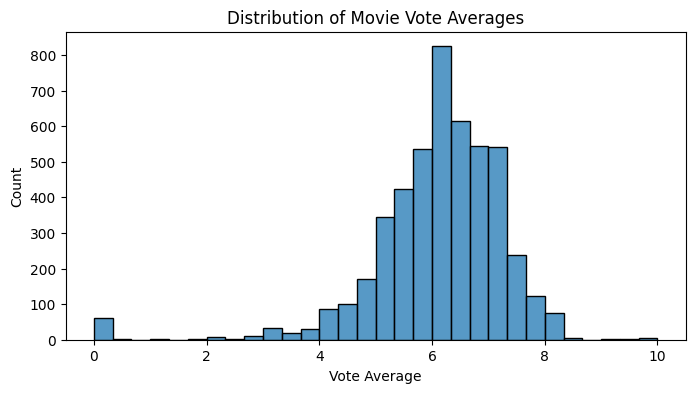

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(merged_df['vote_average'], bins=30, kde=False)
plt.title('Distribution of Movie Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.show()

In [10]:
import ast

def parse_genres(genre_str):
    genres_list = []
    try:
        genres_data = ast.literal_eval(genre_str)
        for g in genres_data:
            genres_list.append(g['name'])
    except:
        pass
    return genres_list


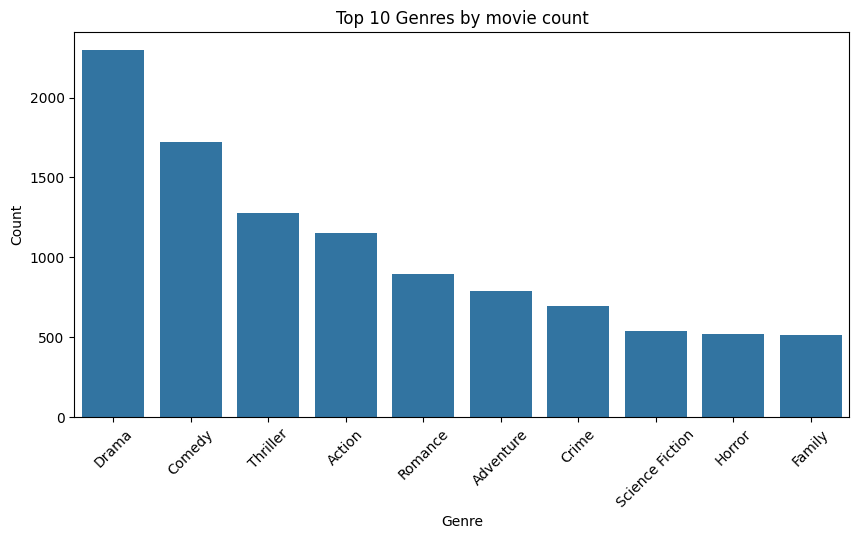

In [11]:
merged_df['parsed_genres'] = merged_df['genres'].apply(parse_genres)

all_genres = []
for g_list in merged_df['parsed_genres']:
    all_genres.extend(g_list)

genre_counts = pd.Series(all_genres).value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10])
plt.title('Top 10 Genres by movie count')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

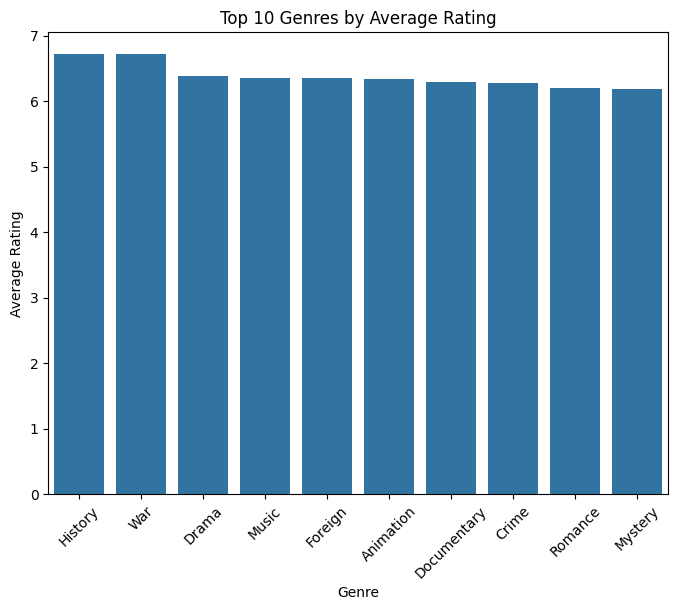

In [12]:
genres_exploded = merged_df.explode('parsed_genres')
genres_exploded = genres_exploded.dropna(subset=['parsed_genres'])

genre_rating = genres_exploded.groupby('parsed_genres')['vote_average'].mean().sort_values(ascending=False)

top_10_genres = genre_rating.head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values)
plt.title("Top 10 Genres by Average Rating")
plt.ylabel("Average Rating")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.show()

 A common approach to rank movies by a weighted rating formula:
 Weighted Rating (WR) = (v/(v+m)) * R + (m/(v+m)) * C
 where:
   R = average rating for the movie
   v = number of votes for the movie
   m = minimum votes required to be considered
   C = mean vote across all movies

In [26]:
C = merged_df['vote_average'].mean()
m = merged_df['vote_count'].quantile(0.50)

print(f"Average vote across all movies (C) = {C}")
print(f"Minimum votes required (m) = {m}")

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(v+m) * C)

Average vote across all movies (C) = 6.094458333333334
Minimum votes required (m) = 236.0


In [27]:
popular_movies = merged_df[merged_df['vote_count'] >= m].copy()
popular_movies['score'] = popular_movies.apply(weighted_rating, axis=1)

popular_movies = popular_movies.sort_values('score', ascending=False)

print("\n=== Top 10 Movies by Weighted Rating ===")
print(popular_movies[['title', 'vote_count', 'vote_average', 'score']].head(10))


=== Top 10 Movies by Weighted Rating ===
                         title  vote_count  vote_average     score
1881  The Shawshank Redemption        8205           8.5  8.432744
3337             The Godfather        5893           8.4  8.311224
662                 Fight Club        9413           8.3  8.246056
3232              Pulp Fiction        8428           8.3  8.239923
1818          Schindler's List        4329           8.3  8.185979
3865                  Whiplash        4254           8.3  8.184074
2294             Spirited Away        3840           8.3  8.172299
65             The Dark Knight       12002           8.2  8.159396
2731    The Godfather: Part II        3338           8.3  8.154363
809               Forrest Gump        7927           8.2  8.139127


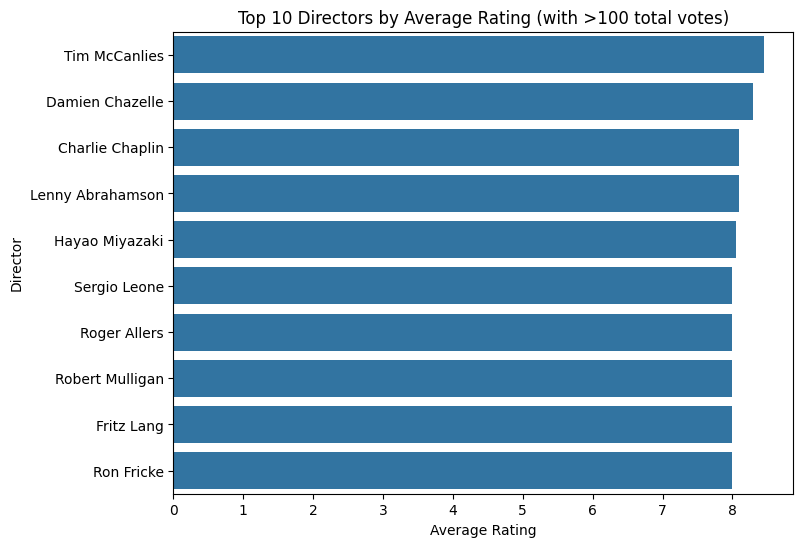

In [15]:


# Parse crew to extract the director name (if not already done)
def parse_director(crew_str):
    director_name = None
    try:
        crew_data = ast.literal_eval(crew_str)
        for c in crew_data:
            if c.get('job') == 'Director':
                director_name = c['name']
                break
    except:
        pass
    return director_name

merged_df['director'] = merged_df['crew'].apply(parse_director)

# Let's group by director and compute the average rating and total votes
director_stats = merged_df.groupby('director').agg({
    'vote_average': 'mean',  # average rating
    'vote_count': 'sum'      # total number of votes across all their films
})

# Filter out directors with very few films or no name
director_stats = director_stats.dropna().query("vote_count > 100")  # remove very small samples
director_stats.sort_values('vote_average', ascending=False, inplace=True)

# Take top 10 directors by average rating
top_10_directors = director_stats.head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_10_directors['vote_average'], y=top_10_directors.index)
plt.title("Top 10 Directors by Average Rating (with >100 total votes)")
plt.xlabel("Average Rating")
plt.ylabel("Director")
plt.show()


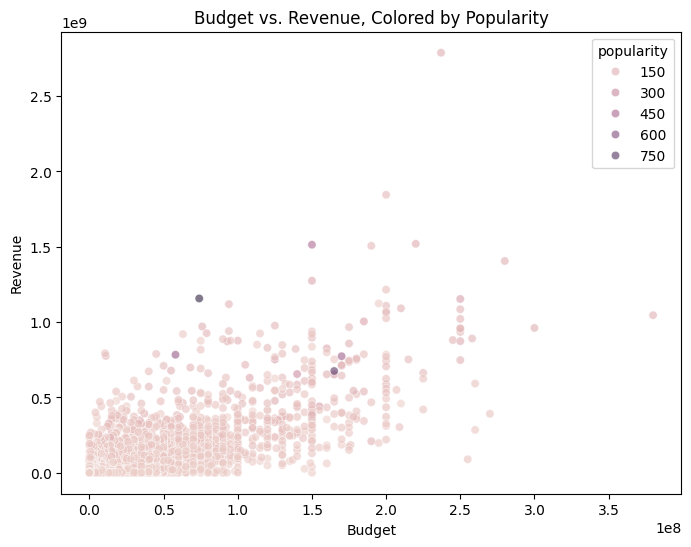

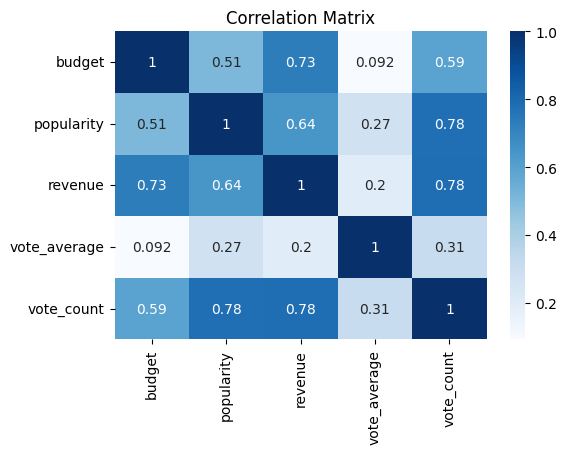

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='budget', y='revenue', hue='popularity', alpha=0.6)
plt.title('Budget vs. Revenue, Colored by Popularity')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

# Correlation matrix among numeric columns
num_cols = ['budget', 'popularity', 'revenue', 'vote_average', 'vote_count']
corr_matrix = merged_df[num_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

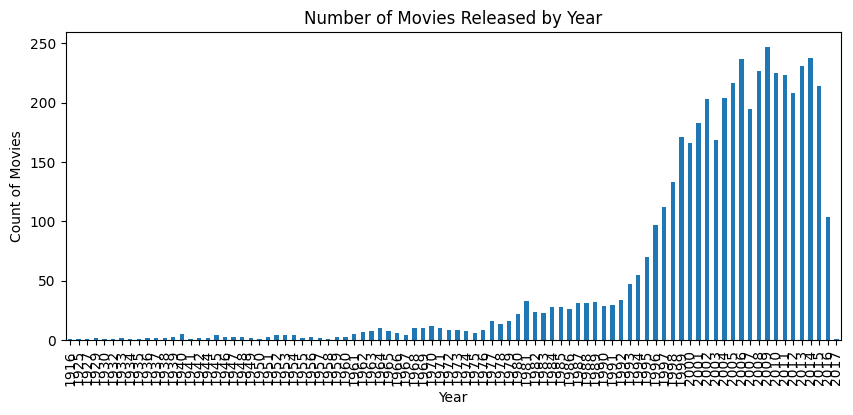

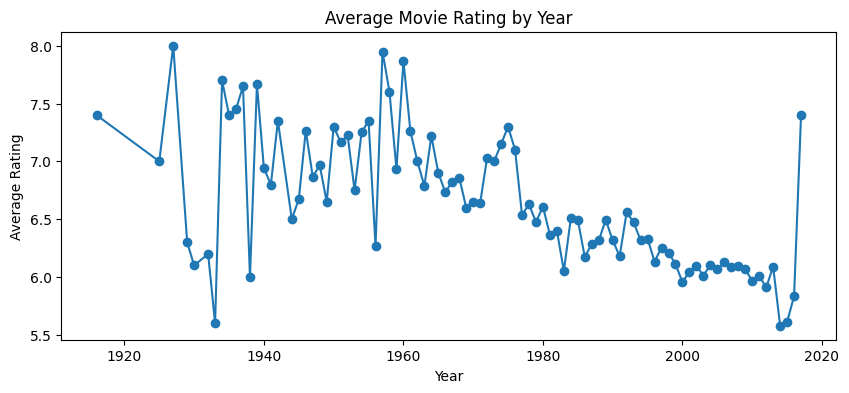

In [17]:
# First, parse release year
merged_df['release_year'] = pd.to_datetime(merged_df['release_date'], errors='coerce').dt.year

# Count how many movies are released each year
year_counts = merged_df.groupby('release_year')['id'].count().dropna()

plt.figure(figsize=(10, 4))
year_counts.plot(kind='bar')
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.show()

# Average rating by year
year_ratings = merged_df.groupby('release_year')['vote_average'].mean()

plt.figure(figsize=(10, 4))
year_ratings.plot(kind='line', marker='o')
plt.title('Average Movie Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


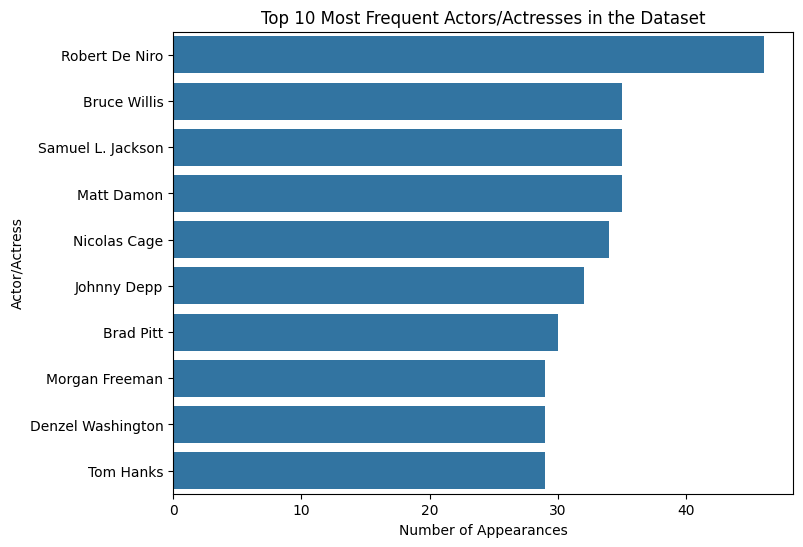

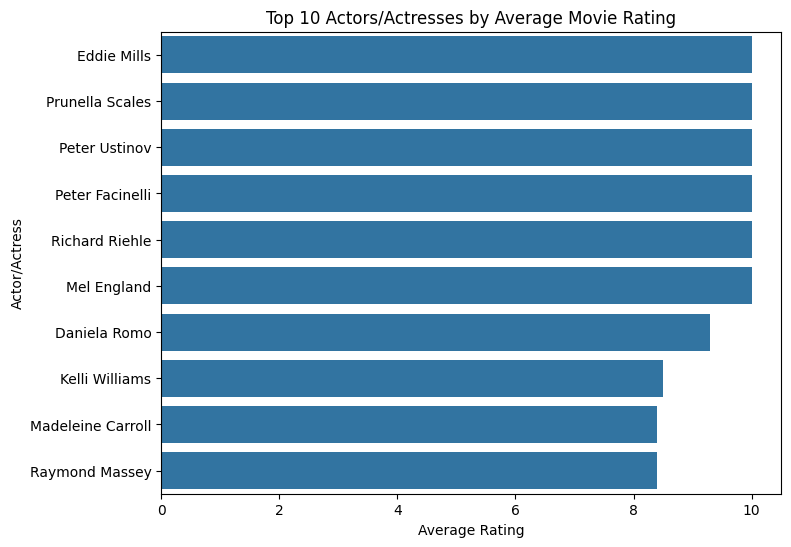

In [18]:
import ast

def parse_cast_top(cast_str, top=3):
    cast_list = []
    try:
        cast_data = ast.literal_eval(cast_str)
        for c in cast_data[:top]:
            cast_list.append(c['name'])
    except:
        pass
    return cast_list

merged_df['cast_top3'] = merged_df['cast'].apply(parse_cast_top)

# Explode
cast_exploded = merged_df.explode('cast_top3').dropna(subset=['cast_top3'])

# Count how many times each actor/actress appears
actor_counts = cast_exploded['cast_top3'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=actor_counts.values, y=actor_counts.index)
plt.title("Top 10 Most Frequent Actors/Actresses in the Dataset")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor/Actress")
plt.show()

# If you want average rating of each actor's movies:
actor_ratings = cast_exploded.groupby('cast_top3')['vote_average'].mean().sort_values(ascending=False)
top_10_actor_ratings = actor_ratings.head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_10_actor_ratings.values, y=top_10_actor_ratings.index)
plt.title("Top 10 Actors/Actresses by Average Movie Rating")
plt.xlabel("Average Rating")
plt.ylabel("Actor/Actress")
plt.show()


Dataset Shape: (4803, 20)

First few rows:

Numeric columns summary:
             budget   popularity       revenue      runtime  vote_average    vote_count
count  4.803000e+03  4803.000000  4.803000e+03  4801.000000   4803.000000   4803.000000
mean   2.904504e+07    21.492301  8.226064e+07   106.875859      6.092172    690.217989
std    4.072239e+07    31.816650  1.628571e+08    22.611935      1.194612   1234.585891
min    0.000000e+00     0.000000  0.000000e+00     0.000000      0.000000      0.000000
25%    7.900000e+05     4.668070  0.000000e+00    94.000000      5.600000     54.000000
50%    1.500000e+07    12.921594  1.917000e+07   103.000000      6.200000    235.000000
75%    4.000000e+07    28.313505  9.291719e+07   118.000000      6.800000    737.000000
max    3.800000e+08   875.581305  2.787965e+09   338.000000     10.000000  13752.000000

Missing values in each column:
homepage        3091
overview           3
release_date       1
runtime            2
tagline          844
re

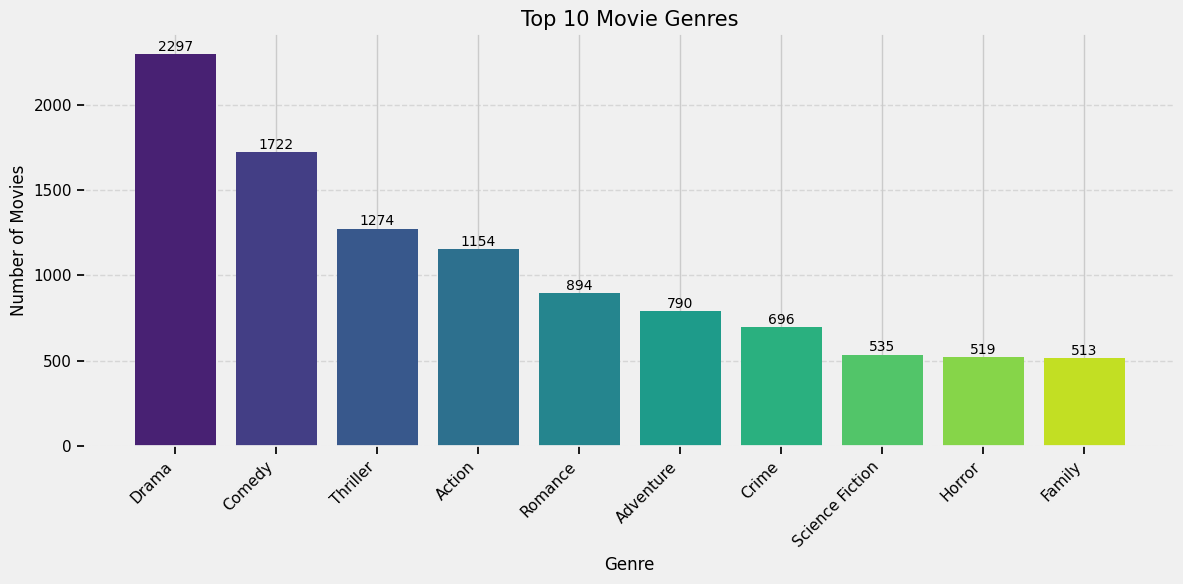

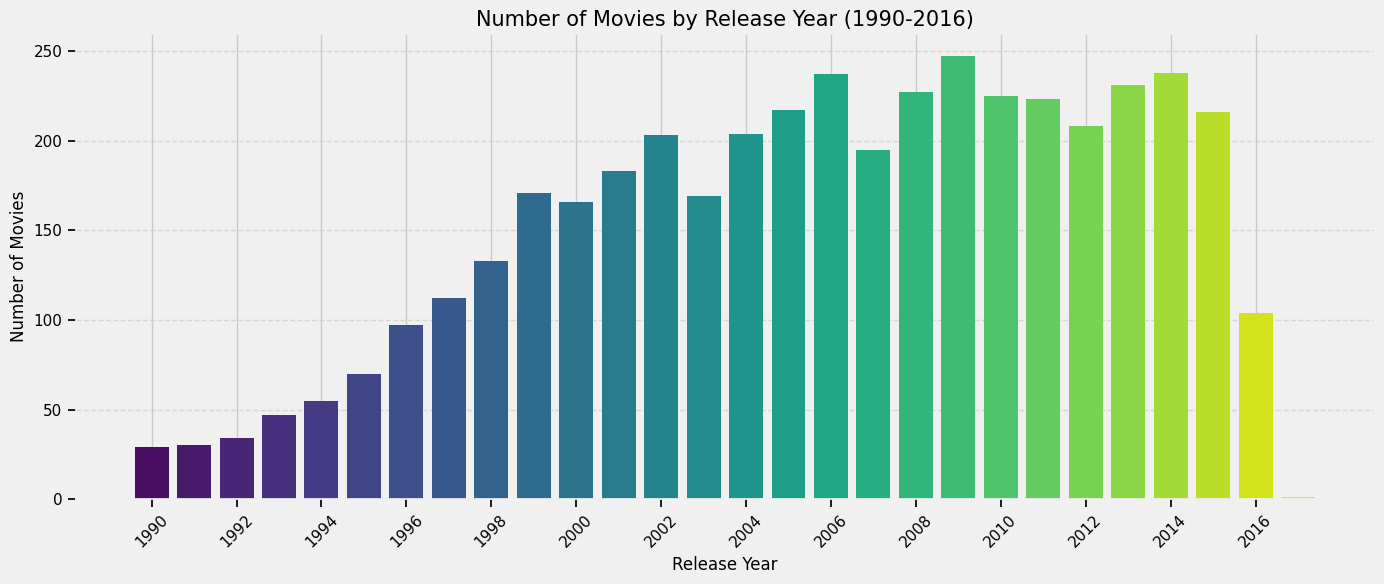

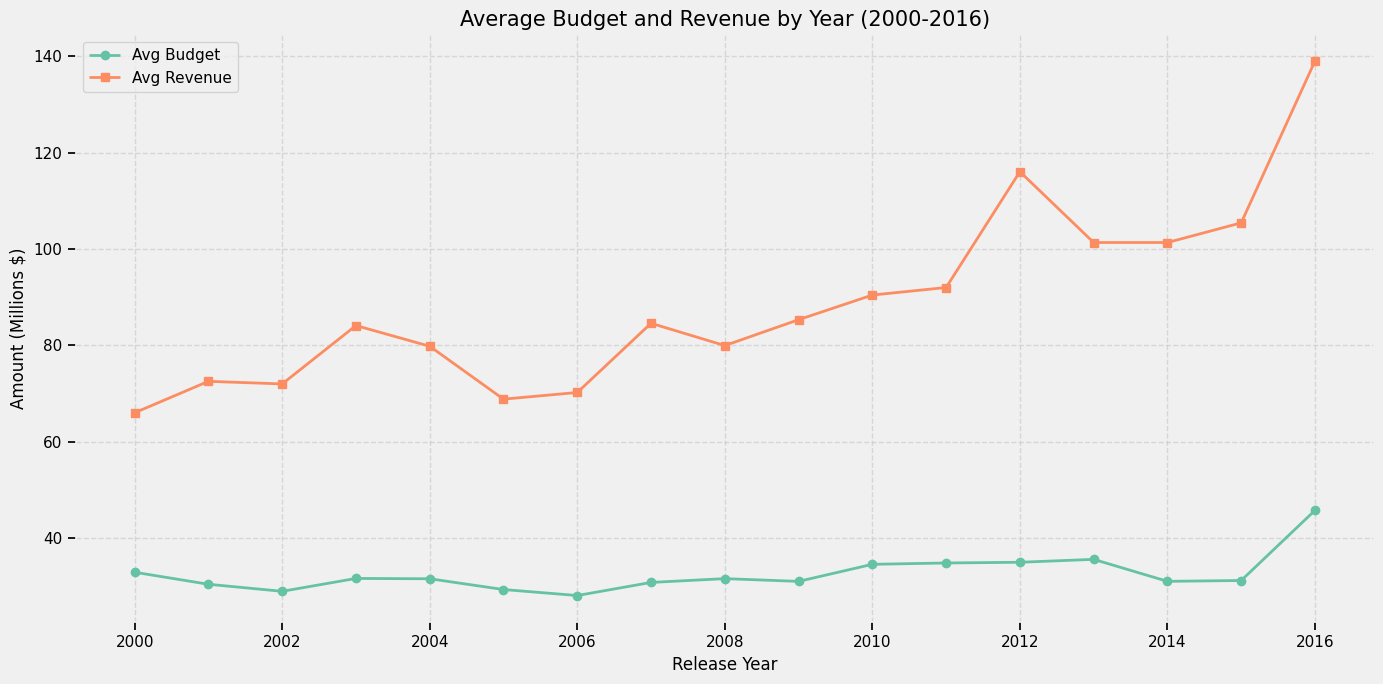

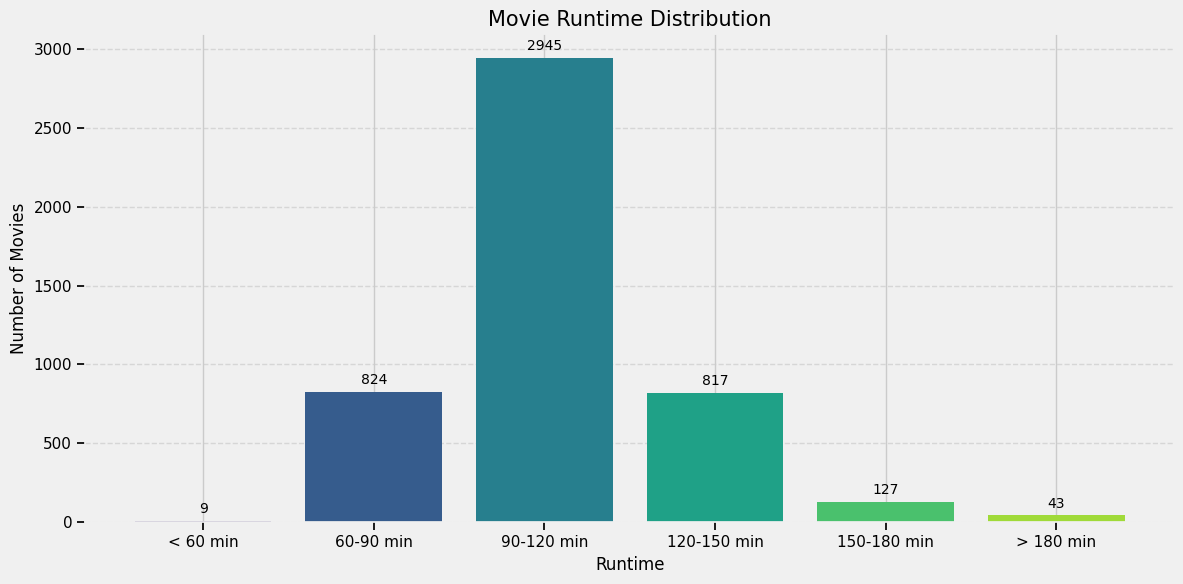

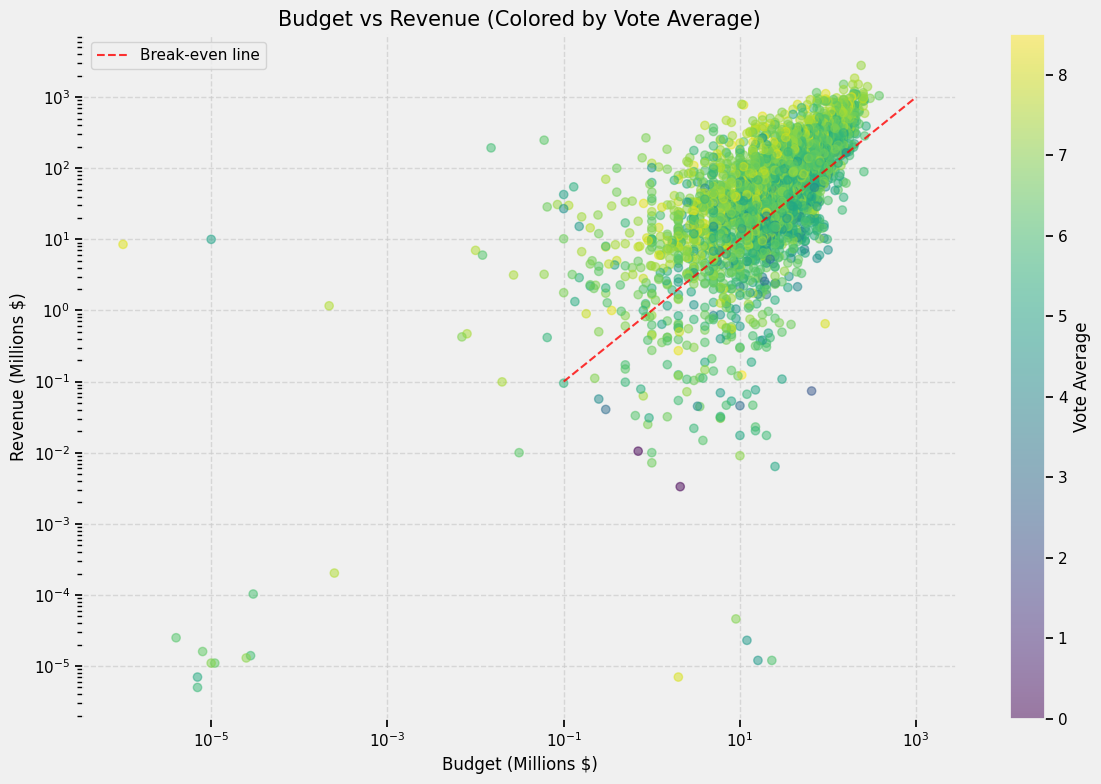

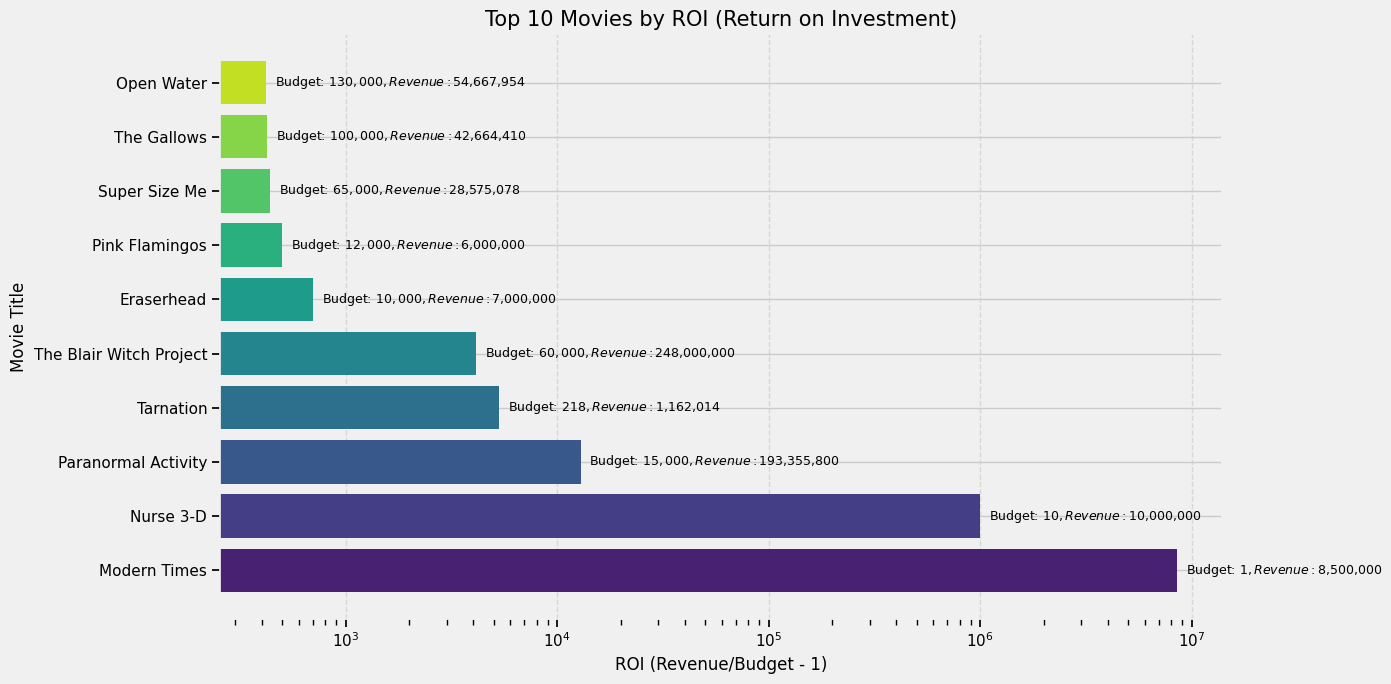

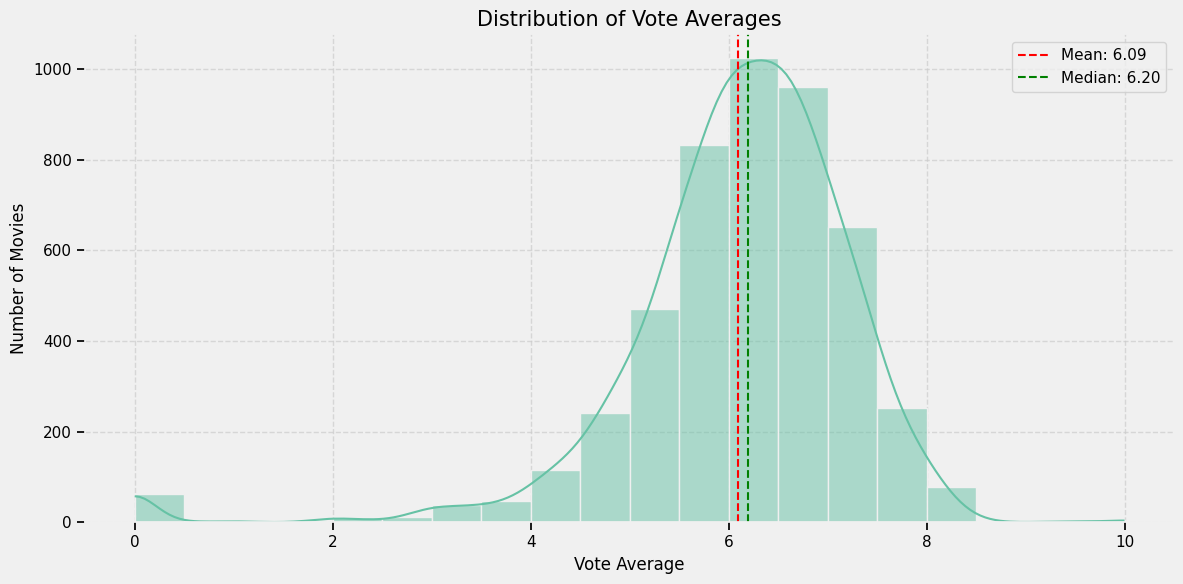

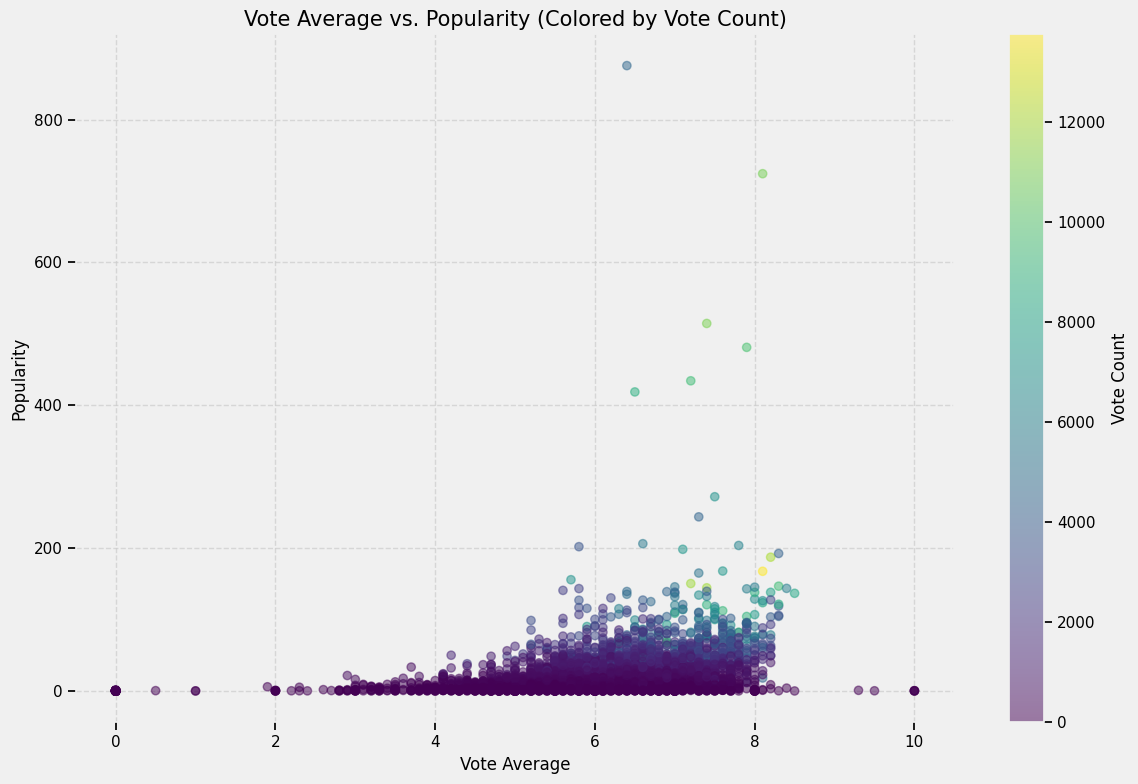

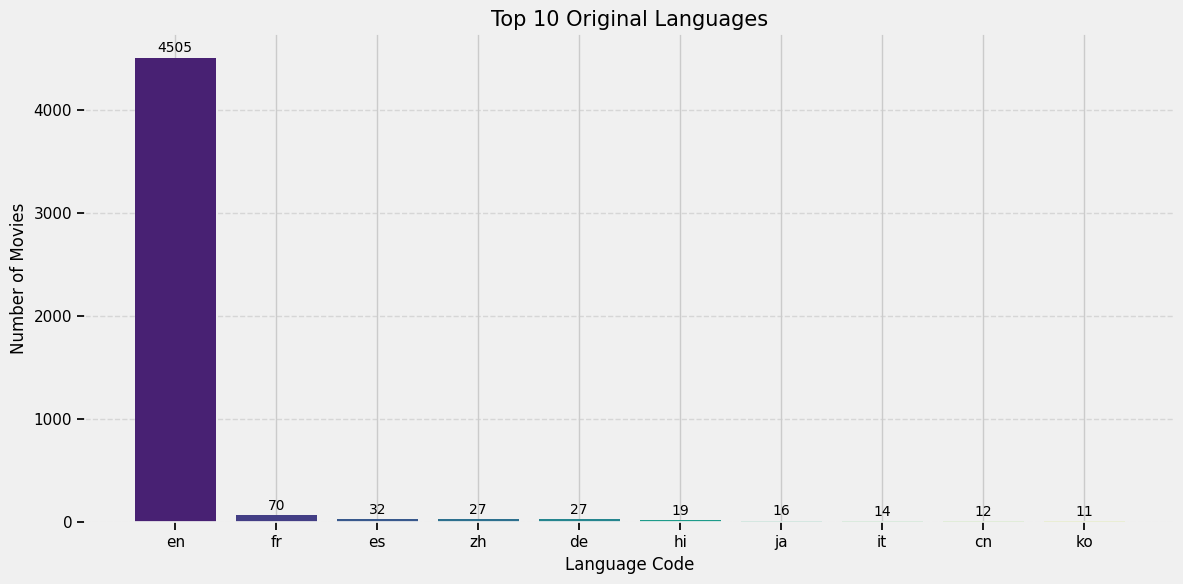

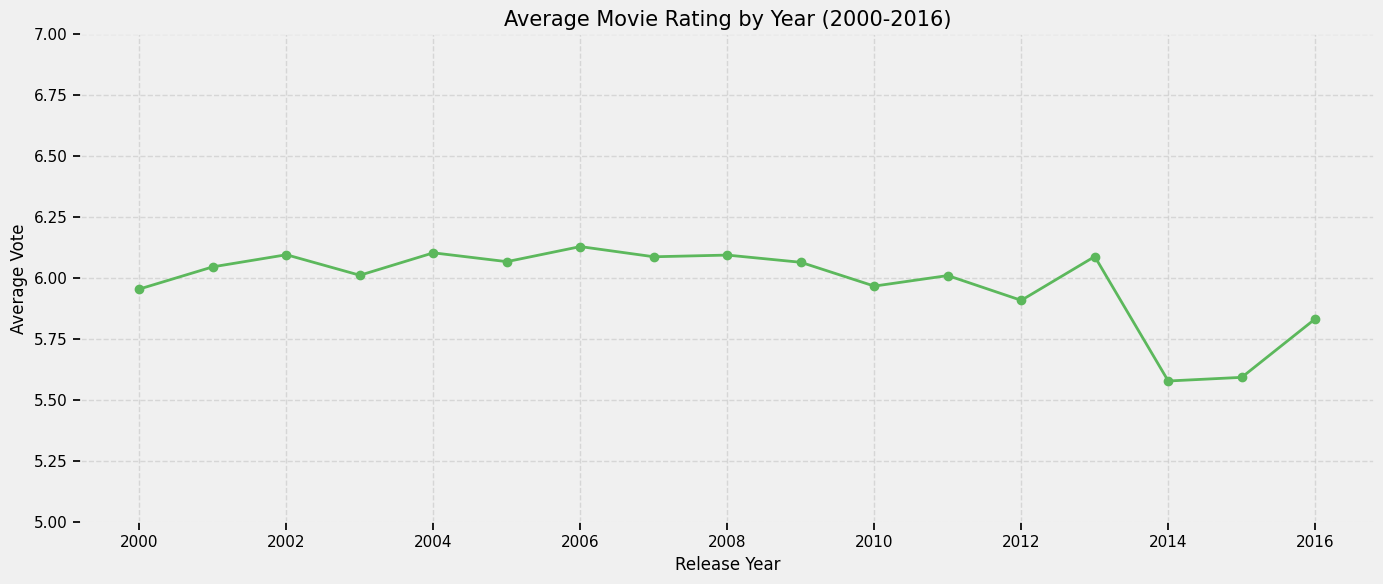

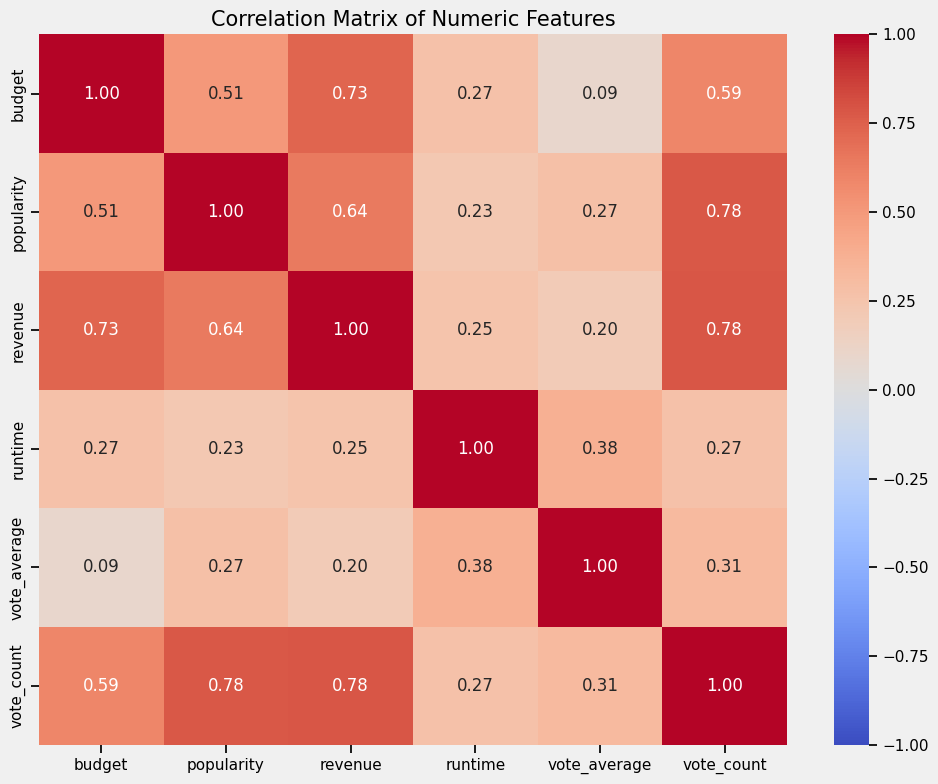

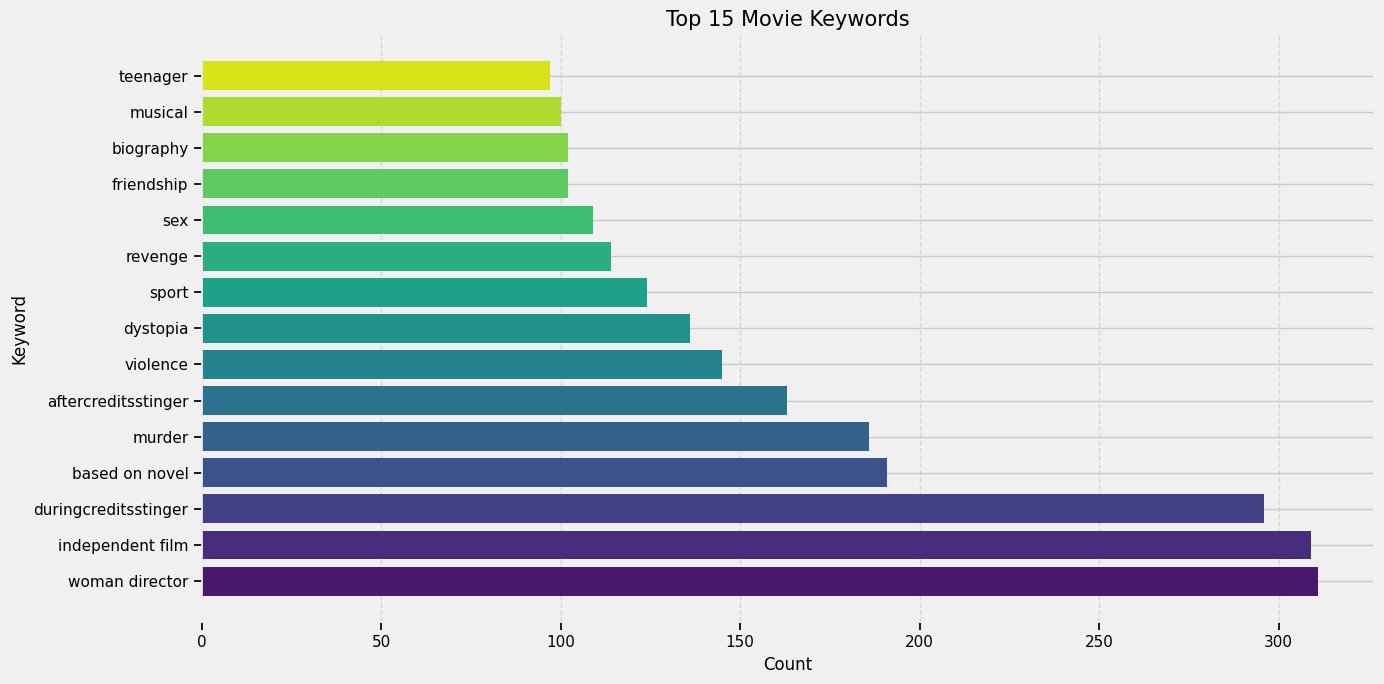


=== SUMMARY FINDINGS ===
1. Most Common Genre: Drama with 2297 movies
2. Average Budget: $29,045,039.88
3. Average Revenue: $82,260,638.65
4. Average Vote: 6.09
5. Correlation between Budget and Revenue: 0.73
6. Most Common Runtime Category: 90-120 min with 2945 movies
7. Movie with Highest ROI: Modern Times (8499999.00x return)
8. Most Movies Released in: 2009.0 with 247 movies
9. Most Common Original Language: en with 4505 movies
10. Average Runtime: 106.88 minutes


In [ ]:
import json
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('fivethirtyeight')
sns.set_palette('Set2')
sns.set_context('notebook')

# Load data
movies_df = pd.read_csv('tmdb_5000_movies.csv')

# Display basic information
print(f"Dataset Shape: {movies_df.shape}")
print("\nFirst few rows:")
movies_df.head(2)

# Data cleaning and preparation functions
def parse_json_column(column):
    """Parse a JSON string column into a Python object."""
    if isinstance(column, str):
        try:
            return json.loads(column.replace("'", '"'))
        except:
            return []
    return []

def extract_names(column):
    """Extract names from a JSON string column."""
    parsed = parse_json_column(column)
    return [item['name'] for item in parsed if 'name' in item]

# Extract genres and keywords
movies_df['genres_list'] = movies_df['genres'].apply(extract_names)
movies_df['keywords_list'] = movies_df['keywords'].apply(extract_names)
movies_df['production_companies_list'] = movies_df['production_companies'].apply(extract_names)
movies_df['production_countries_list'] = movies_df['production_countries'].apply(extract_names)

# Convert release_date to datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
movies_df['release_year'] = movies_df['release_date'].dt.year

# Count movies by year
year_counts = movies_df['release_year'].value_counts().sort_index()
valid_years = year_counts[year_counts.index.notnull()]

# Explore numeric columns
numeric_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
movies_numeric = movies_df[numeric_cols].describe()
print("\nNumeric columns summary:")
print(movies_numeric)

# Create ROI column
movies_df['roi'] = (movies_df['revenue'] - movies_df['budget']) / movies_df['budget']
movies_df['roi'] = movies_df['roi'].replace([np.inf, -np.inf], np.nan)

# Check missing values
missing_data = movies_df.isnull().sum()
print("\nMissing values in each column:")
print(missing_data[missing_data > 0])

# Filter to only include movies with valid budget and revenue
valid_budget_revenue = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)]
print(f"\nMovies with valid budget and revenue: {len(valid_budget_revenue)}")

# Flatten the genres list to count occurrence
all_genres = [genre for genres in movies_df['genres_list'] for genre in genres]
genre_counts = Counter(all_genres)
top_genres = pd.DataFrame({
    'Genre': list(dict(genre_counts.most_common(10)).keys()),
    'Count': list(dict(genre_counts.most_common(10)).values())
})

# Visualization 1: Top 10 Genres
plt.figure(figsize=(12, 6))
bars = plt.bar(top_genres['Genre'], top_genres['Count'], color=sns.color_palette('viridis', 10))
plt.title('Top 10 Movie Genres', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2., 
             bar.get_height() + 20, 
             str(int(bar.get_height())), 
             ha='center', fontsize=10)
plt.show()

# Visualization 2: Movies by Release Year
plt.figure(figsize=(14, 6))
recent_years = valid_years[valid_years.index >= 1990]
plt.bar(recent_years.index, recent_years.values, color=sns.color_palette('viridis', len(recent_years)))
plt.title('Number of Movies by Release Year (1990-2016)', fontsize=15)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(range(1990, 2017, 2), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 3: Average Budget and Revenue by Year
yearly_metrics = movies_df.groupby('release_year').agg({
    'budget': 'mean',
    'revenue': 'mean',
    'vote_average': 'mean'
}).reset_index()

# Filter to recent years for clearer visualization
recent_metrics = yearly_metrics[(yearly_metrics['release_year'] >= 2000) & 
                               (yearly_metrics['release_year'] <= 2016)]

plt.figure(figsize=(14, 7))
plt.plot(recent_metrics['release_year'], recent_metrics['budget']/1000000, marker='o', linewidth=2, label='Avg Budget')
plt.plot(recent_metrics['release_year'], recent_metrics['revenue']/1000000, marker='s', linewidth=2, label='Avg Revenue')
plt.title('Average Budget and Revenue by Year (2000-2016)', fontsize=15)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Amount (Millions $)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 4: Runtime Distribution
runtime_bins = [0, 60, 90, 120, 150, 180, 300]
runtime_labels = ['< 60 min', '60-90 min', '90-120 min', '120-150 min', '150-180 min', '> 180 min']
movies_df['runtime_category'] = pd.cut(movies_df['runtime'], bins=runtime_bins, labels=runtime_labels)
runtime_dist = movies_df['runtime_category'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(runtime_dist.index, runtime_dist.values, color=sns.color_palette('viridis', len(runtime_dist)))
plt.title('Movie Runtime Distribution', fontsize=15)
plt.xlabel('Runtime', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(runtime_dist.values):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Visualization 5: Budget vs Revenue Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(valid_budget_revenue['budget']/1000000, 
            valid_budget_revenue['revenue']/1000000, 
            alpha=0.5, 
            c=valid_budget_revenue['vote_average'], 
            cmap='viridis')
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='Vote Average')
plt.title('Budget vs Revenue (Colored by Vote Average)', fontsize=15)
plt.xlabel('Budget (Millions $)', fontsize=12)
plt.ylabel('Revenue (Millions $)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# Add a reference line y=x
x_ref = np.linspace(0.1, 1000, 100)
plt.plot(x_ref, x_ref, 'r--', alpha=0.8, label='Break-even line')
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 6: Top 10 Movies by ROI
top_roi = valid_budget_revenue.sort_values('roi', ascending=False).head(10)
top_roi['roi_percentage'] = top_roi['roi'] * 100

plt.figure(figsize=(14, 7))
bars = plt.barh(top_roi['title'], top_roi['roi'], color=sns.color_palette('viridis', len(top_roi)))
plt.title('Top 10 Movies by ROI (Return on Investment)', fontsize=15)
plt.xlabel('ROI (Revenue/Budget - 1)', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.xscale('log')
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Add budget and revenue information
for i, (idx, row) in enumerate(top_roi.iterrows()):
    plt.text(row['roi'] * 1.1, i, 
             f"Budget: ${row['budget']:,}, Revenue: ${row['revenue']:,}", 
             va='center', fontsize=9)
plt.tight_layout()
plt.show()

# Visualization 7: Vote Average Distribution
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Vote Averages', fontsize=15)
plt.xlabel('Vote Average', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(movies_df['vote_average'].mean(), color='r', linestyle='--', label=f'Mean: {movies_df["vote_average"].mean():.2f}')
plt.axvline(movies_df['vote_average'].median(), color='g', linestyle='--', label=f'Median: {movies_df["vote_average"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 8: Vote Average vs. Popularity
plt.figure(figsize=(12, 8))
plt.scatter(movies_df['vote_average'], movies_df['popularity'], alpha=0.5, c=movies_df['vote_count'], cmap='viridis')
plt.colorbar(label='Vote Count')
plt.title('Vote Average vs. Popularity (Colored by Vote Count)', fontsize=15)
plt.xlabel('Vote Average', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 9: Original Language Distribution
language_counts = movies_df['original_language'].value_counts().head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(language_counts.index, language_counts.values, color=sns.color_palette('viridis', len(language_counts)))
plt.title('Top 10 Original Languages', fontsize=15)
plt.xlabel('Language Code', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2., 
             bar.get_height() + 50, 
             str(int(bar.get_height())), 
             ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Visualization 10: Average Rating Trend Over Time
yearly_ratings = movies_df.groupby('release_year')['vote_average'].mean()
recent_ratings = yearly_ratings[(yearly_ratings.index >= 2000) & (yearly_ratings.index <= 2016)]

plt.figure(figsize=(14, 6))
plt.plot(recent_ratings.index, recent_ratings.values, marker='o', linewidth=2, color='#5cb85c')
plt.title('Average Movie Rating by Year (2000-2016)', fontsize=15)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Vote', fontsize=12)
plt.ylim(5, 7)  # Set y-axis limits for better visualization
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Correlation Analysis
corr_matrix = movies_df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features', fontsize=15)
plt.tight_layout()
plt.show()

# Keyword Analysis
all_keywords = [keyword for keywords in movies_df['keywords_list'] for keyword in keywords]
keyword_counts = Counter(all_keywords)
top_keywords = pd.DataFrame({
    'Keyword': list(dict(keyword_counts.most_common(15)).keys()),
    'Count': list(dict(keyword_counts.most_common(15)).values())
})

plt.figure(figsize=(14, 7))
bars = plt.barh(top_keywords['Keyword'], top_keywords['Count'], color=sns.color_palette('viridis', len(top_keywords)))
plt.title('Top 15 Movie Keywords', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Summary statistics and key findings
print("\n=== SUMMARY FINDINGS ===")
print(f"1. Most Common Genre: {genre_counts.most_common(1)[0][0]} with {genre_counts.most_common(1)[0][1]} movies")
print(f"2. Average Budget: ${movies_df['budget'].mean():,.2f}")
print(f"3. Average Revenue: ${movies_df['revenue'].mean():,.2f}")
print(f"4. Average Vote: {movies_df['vote_average'].mean():.2f}")
print(f"5. Correlation between Budget and Revenue: {corr_matrix.loc['budget', 'revenue']:.2f}")
print(f"6. Most Common Runtime Category: {runtime_dist.idxmax()} with {runtime_dist.max()} movies")
print(f"7. Movie with Highest ROI: {top_roi.iloc[0]['title']} ({top_roi.iloc[0]['roi']:.2f}x return)")
print(f"8. Most Movies Released in: {year_counts.idxmax()} with {year_counts.max()} movies")
print(f"9. Most Common Original Language: {language_counts.index[0]} with {language_counts.values[0]} movies")
print(f"10. Average Runtime: {movies_df['runtime'].mean():.2f} minutes")